Descriptive and Inferential Analysis

## Definitions
* E = Everyone
* ET = EVeryone 10+
* T = Teen
* M = Mature

Console:
* 0 = Playstation 4
* 1 = PS4 & Xbox One

The following are 0 = no, 1 = yes
* alcohol_reference	= Reference to and/or images of alcoholic beverages.
* animated_blood = Discolored and/or unrealistic depictions of blood.
* blood = Depcitions of blood.
* blood_and_gore = Depictions of blood or the mutilation of body parts.
* cartoon_violence = Violent actions involving cartoon-like situations and characters. May include violence where a character is unharmed after the action has been inflicted.
* crude_humor = Depictions or dialogue involving vulgar antics, including "bathroom" humor.
* drug_reference = Reference to and/or images of illegal drugs.
* fantasy_violence = Violent actions of a fantasy nature, involving human or non-human characters in situations easily distinguishable from real life.
* intense_violence = Graphic and realistic-looking depictions of physical conflict. May involve extreme and/or realistic blood, gore, weapons, and depictions of human injury and death.
* language = Moderate use of profanity.
* lyrics = References to profanity, sexuality, violence, alcohol, or drug use in music.
* mature_humor = Depictions or dialogue involving "adult" humor, including sexual references.
* mild_blood = Some blood.
* mild_cartoon_violence = Some violent actions involving cartoon.
* mild_fantasy_violence = Some violent actions of a fantasy nature.
* mild_language = Mild to moderate use of profanity.
* mild_lyrics = Mild References to profanity, sexuality, violence, alcohol, or drug use in music.
* mild_suggestive_themes = some provocative references or materials.
* mild_violence = Some scenes involving aggressive conflict.
* no_descriptors = No content descriptors.
* nudity = Graphic or prolonged depictions of nudity.
* partial_nudity = Brief and/or mild depictions of nudity.
* sexual_content = Non-explicit depictions of sexual behavior, possibly including partial nudity.
* sexual_themes = References to sex or sexuality.
* simulated_gambling = Player can gamble without betting or wagering real cash or currency.
* strong_language = Explicit and/or frequent use of profanity.
* strong_sexual_content = Explicit and/or frequent depictions of sexual behavior, possibly including nudity.
* suggestive_themes = Provocative references or materials.
* use_of_alcohol = The consumption of alcoholic beverages.
* use_of_drugs_and_alcohol = The consumption of alcoholic and drugs beverages.
* violence = Scenes involving aggressive conflict. May contain bloodless dismemberment.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_csv('data/esrb_ratings.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

Check for null values.

In [3]:
df.isnull().sum()

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_ratin

Looks pretty clean, given that most columns are binary

In [4]:
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


Check which ratings are present in this dataset

In [5]:
df.esrb_rating.unique()

array(['E', 'ET', 'M', 'T'], dtype=object)

Just check for duplicates, since this is a smaller dataset and don't want to make it smaller

In [6]:
df[df.duplicated()]

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating


In [18]:
# create a function for making countplot graphs
def plot_counts(x, data):
    plt.figure(figsize=(8,8))
    sns.countplot(x=x, data=data)

    # Adding title and labels
    plt.title(f'Count of {x.capitalize()}', fontsize=16)
    plt.xlabel(f'{x.capitalize()}', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    plt.show()

### What are the ratings represented in this dataset?

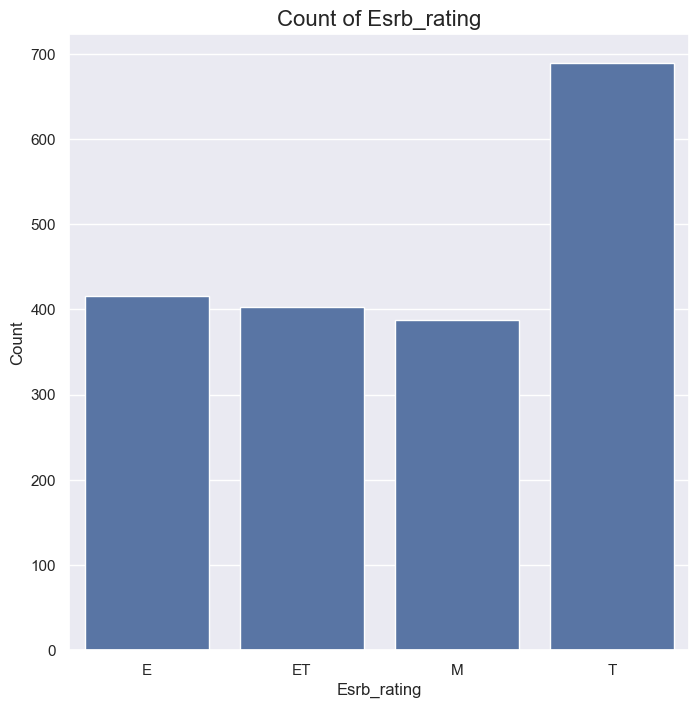

In [19]:
plot_counts('esrb_rating', df)

Mostly Teen rated games. 

### How many violent video games are present in the dataset?

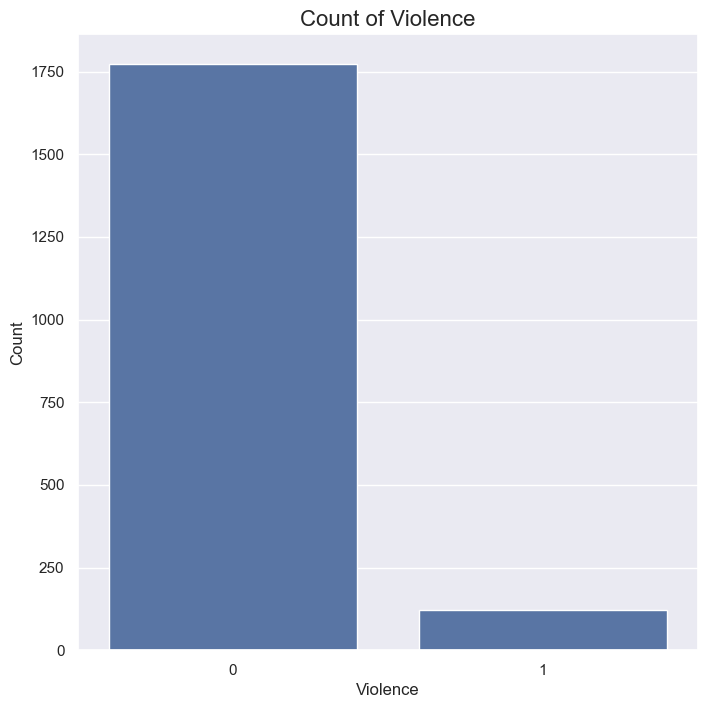

In [20]:
plot_counts('violence', df)

Seems low for this

Let's check other types of violence

### How many games contain cartoon violence?

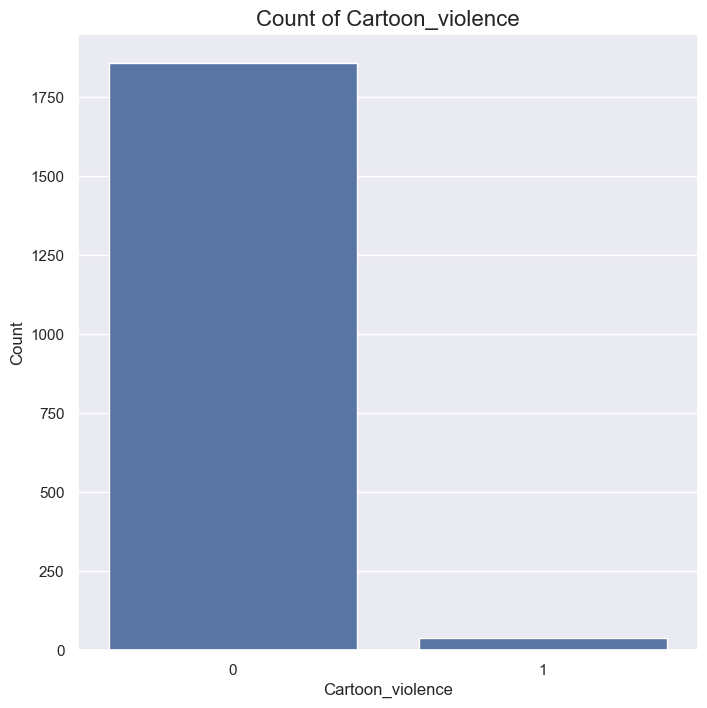

In [21]:
plot_counts('cartoon_violence', df)

### How many games contain fantasy violence?

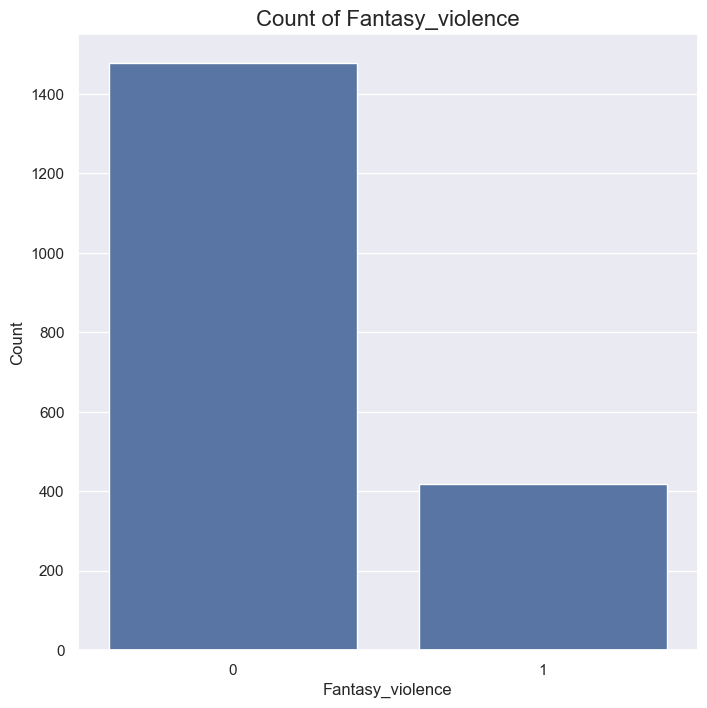

In [22]:
plot_counts('fantasy_violence', df)

So Violence is categorized differently throughout all the games. It might be good to show all violence categories to get a full count. 

### How is violence represented throughout entire dataset?

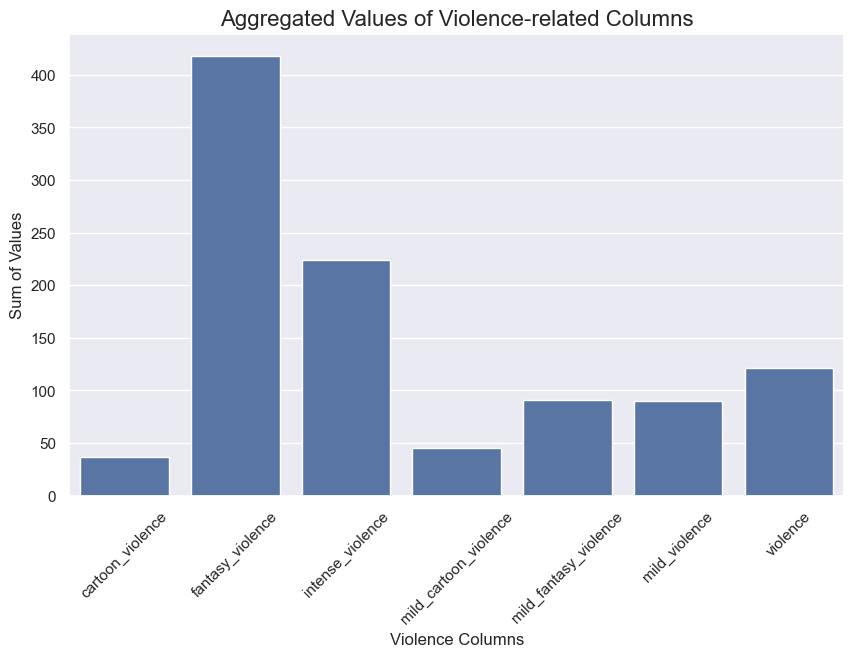

In [23]:
# Step 1: Select columns containing the word 'violence'
violence_columns = df.filter(like='violence')

# Step 2: Aggregate the values by summing up rows (or choose another aggregation method)
# If you want the sum of each column:
violence_aggregated = violence_columns.sum()

# Step 3: Plot the aggregated data
plt.figure(figsize=(10, 6))
sns.barplot(x=violence_aggregated.index, y=violence_aggregated.values)

# Adding title and labels
plt.title('Aggregated Values of Violence-related Columns', fontsize=16)
plt.xlabel('Violence Columns', fontsize=12)
plt.ylabel('Sum of Values', fontsize=12)

# Rotate x labels for better readability if necessary
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [24]:
total_violence_count = violence_columns.sum().sum() #get sum for each column and then the sum of those sums

print(f"Total count across all 'violence' columns: {total_violence_count}")

Total count across all 'violence' columns: 1026


Now that number makes a lot more sense for violence throughout all games in this dataset. 

### Do E rated games contain any types of violence?

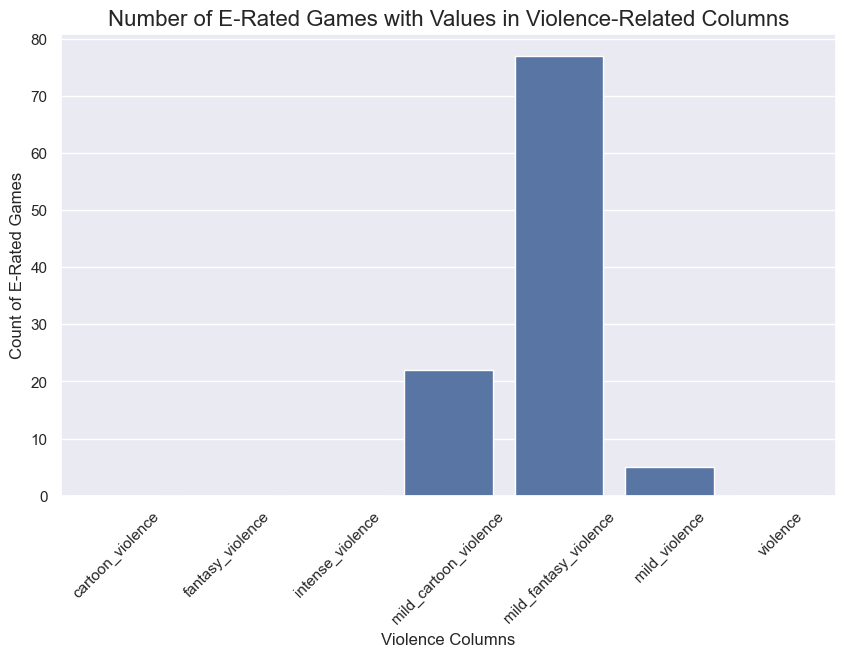

In [26]:
# Filter rows where the 'esrb_ratings' column is 'E'
e_rated_games = df[df['esrb_rating'] == 'E']

# Select columns containing the word 'violence'
violence_columns = e_rated_games.filter(like='violence')

# Step 3: Count how many E-rated games have non-zero values in each violence-related column
violence_counts = (violence_columns > 0).sum()

# Step 4: Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=violence_counts.index, y=violence_counts.values)

# Adding title and labels
plt.title('Number of E-Rated Games with Values in Violence-Related Columns', fontsize=16)
plt.xlabel('Violence Columns', fontsize=12)
plt.ylabel('Count of E-Rated Games', fontsize=12)

# Rotate x labels for better readability if necessary
plt.xticks(rotation=45)

# Display the plot
plt.show()

### Are E rated games containing any drug or alcohol references?

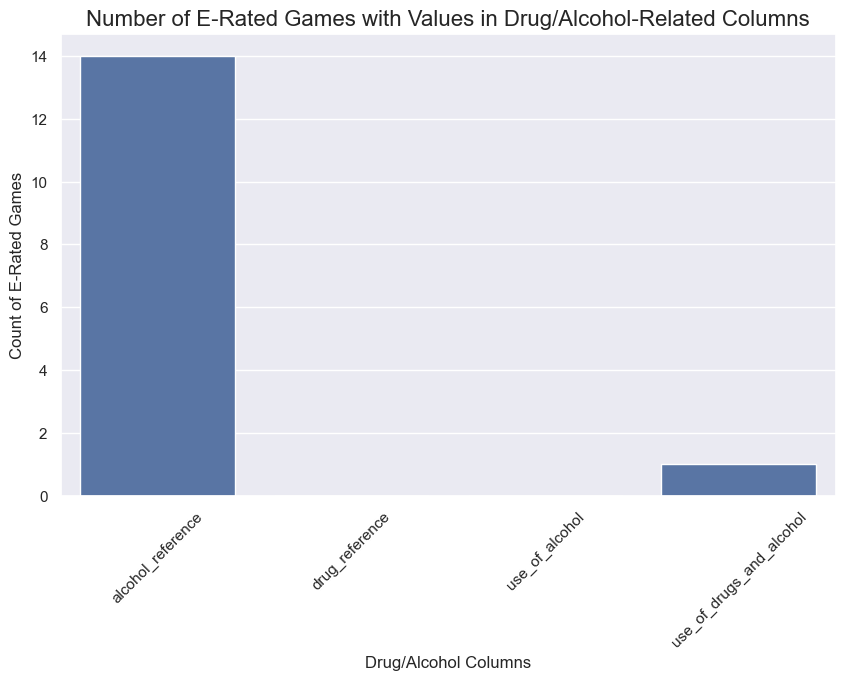

In [28]:
# Filter columns containing the words 'drug' or 'alcohol'
drug_alcohol_columns = e_rated_games.filter(regex='drug|alcohol', axis=1)

# Step 2: Count how many E-rated games have non-zero values in each drug/alcohol-related column
drug_alcohol_counts = (drug_alcohol_columns > 0).sum()

# Step 3: Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=drug_alcohol_counts.index, y=drug_alcohol_counts.values)

# Adding title and labels
plt.title('Number of E-Rated Games with Values in Drug/Alcohol-Related Columns', fontsize=16)
plt.xlabel('Drug/Alcohol Columns', fontsize=12)
plt.ylabel('Count of E-Rated Games', fontsize=12)

# Rotate x labels for better readability if necessary
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [30]:
# Step 2: Identify rows where any of the 'drug' or 'alcohol' columns have non-zero values
games_with_drug_or_alcohol = e_rated_games[drug_alcohol_columns.sum(axis=1) > 0]

# Step 3: List the titles of those games
game_titles_with_drug_or_alcohol = games_with_drug_or_alcohol['title']

# Display the titles
if not game_titles_with_drug_or_alcohol.empty:
    print(f"Number of E-rated games with drug/alcohol-related content: {len(game_titles_with_drug_or_alcohol)}")
    print(game_titles_with_drug_or_alcohol)
else:
    print("No E-rated games with drug/alcohol-related content found.")

Number of E-rated games with drug/alcohol-related content: 15
48      Who Wants to Be a Millionaire?
162                 Giraffe and Annika
195                     Project CARS 3
395      Shovel Knight: Treasure Trove
483                   Farmer's Dynasty
779                    A-Train Express
1175      HomeStarVR for PlayStationVR
1228            ACA NEOGEO RIDING HERO
1286                              Shio
1349           ACA NEOGEO GHOST PILOTS
1480                 Konrad the Kitten
1543                    Railway Empire
1735           Island Flight Simulator
1751       Absolute Drift: Zen Edition
1779                        EVEREST VR
Name: title, dtype: object
